# Road Traffic Severity Classification


The data set is collected from Addis Ababa Sub-city police departments for master's research work. The data set has been prepared from manual records of road traffic accidents of the year 2017-20. All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms. 


 The target feature is **Accident\_severity** which is a multi-class variable. The task is to classify this variable based on the other 31 features . The metric for evaluation is **f1-score**.



### Import Libraries

In [1]:
#Import the libraries
import pandas as pd
# !pip install dabl
# import dabl
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns



import seaborn as sns
import numpy as np
# from sklearn.impute import SimpleImputer
style.use('ggplot')
sns.set_palette('Set2')

### Read the dataset

In [2]:
df = pd.read_csv('RTA Dataset.csv')

In [3]:
#Observe the data
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [5]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
1856,14:00:00,Wednesday,18-30,Male,NaN,NaN,NaN,Automobile,Owner,NaN,...,Getting off,na,na,na,na,NaN,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
5317,17:50:00,Friday,31-50,Male,Junior high school,Employee,Above 10yr,Other,Owner,NaN,...,NaN,na,na,na,na,Driver,Normal,Not a Pedestrian,Overturning,Slight Injury
10433,19:00:00,Tuesday,18-30,Male,Junior high school,Employee,5-10yr,Stationwagen,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
9843,17:45:00,Sunday,31-50,Unknown,Junior high school,Employee,5-10yr,Other,Owner,Above 10yr,...,Going straight,Pedestrian,Male,31-50,3,NaN,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
7519,17:34:00,Monday,31-50,Male,Junior high school,Employee,2-5yr,Public (13?45 seats),Owner,Unknown,...,Reversing,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury


### Exploratory Data Analysis

In [6]:
# Shape of data

df.shape

(12316, 32)

The data set has 12316 rows across 32 columns 

In [7]:
# checking the columns of the dataset
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [8]:
# renaming columns
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
df.rename(columns = col_map,inplace= True)

In [9]:
# checking the datatypes
df.dtypes

time                       object
day_of_week                object
driver_age                 object
driver_sex                 object
educational_level          object
vehicle_driver_relation    object
driving_experience         object
vehicle_type               object
vehicle_owner              object
service_year               object
vehicle_defect             object
accident_area              object
lanes                      object
road_allignment            object
junction_type              object
surface_type               object
road_surface_conditions    object
light_condition            object
weather_condition          object
collision_type             object
vehicles_involved           int64
casualties                  int64
vehicle_movement           object
casualty_class             object
casualty_sex               object
casualty_age               object
casualty_severity          object
casualty_work              object
casualty_fitness           object
pedestrian_mov

In [10]:
#Looking for missing values
df.isnull().any()

time                       False
day_of_week                False
driver_age                 False
driver_sex                 False
educational_level           True
vehicle_driver_relation     True
driving_experience          True
vehicle_type                True
vehicle_owner               True
service_year                True
vehicle_defect              True
accident_area               True
lanes                       True
road_allignment             True
junction_type               True
surface_type                True
road_surface_conditions    False
light_condition            False
weather_condition          False
collision_type              True
vehicles_involved          False
casualties                 False
vehicle_movement            True
casualty_class             False
casualty_sex               False
casualty_age               False
casualty_severity          False
casualty_work               True
casualty_fitness            True
pedestrian_movement        False
accident_c

In [11]:
# Missing values per column
df.isnull().sum()

time                          0
day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident

In [12]:
# Print the sum of null data in each column
df.isna().sum()

time                          0
day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident

In [13]:
# Unique valuesper column
df.nunique()

time                       1074
day_of_week                   7
driver_age                    5
driver_sex                    3
educational_level             7
vehicle_driver_relation       4
driving_experience            7
vehicle_type                 17
vehicle_owner                 4
service_year                  6
vehicle_defect                3
accident_area                14
lanes                         7
road_allignment               9
junction_type                 8
surface_type                  5
road_surface_conditions       4
light_condition               4
weather_condition             9
collision_type               10
vehicles_involved             6
casualties                    8
vehicle_movement             13
casualty_class                4
casualty_sex                  3
casualty_age                  6
casualty_severity             4
casualty_work                 7
casualty_fitness              5
pedestrian_movement           9
accident_cause               20
accident

In [14]:
# Summing up all info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

#### observations:

Number of observations: 12316

Number of columns: 31

Memory Usage: 3.0 + MB

Number of boolean columns: 0

Number of category columns: 0

Number of float columns: 0

Number of int columns: 2

Number of object columns: 29

Number of columns with missing values: 16


In [15]:
#checking for any duplicates
# df.duplicated()

In [16]:
#No duplicate data found
df.duplicated().sum()

0

### Statistical summary of data

In [17]:
df.describe()

,vehicles_involved,casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


Looks like the data is skewed

This provides description only for numerical columns. To get info of categorical cols, use include = category in the describe function.


In [18]:
# rta.describe() #(include="all")

In [19]:
df.describe(include="object").T

,count,unique,top,freq
time,12316,1074,15:30:00,120
day_of_week,12316,7,Friday,2041
driver_age,12316,5,18-30,4271
driver_sex,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
vehicle_type,11366,17,Automobile,3205
vehicle_owner,11834,4,Owner,10459
service_year,8388,6,Unknown,2883


In [20]:
#Converting to date time format
df['time']=pd.to_datetime(df['time'])
df.head()

,time,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity
0,2022-07-31 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,2022-07-31 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,2022-07-31 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2022-07-31 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2022-07-31 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [21]:
#Including hour and minute column
df['hour']=df['time'].dt.hour
df['minute']=df['time'].dt.minute
df.drop('time',axis = 1,inplace = True)

In [22]:
df.head()

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17,2
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17,2
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17,2
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,6
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1,6


### Data visualizations

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


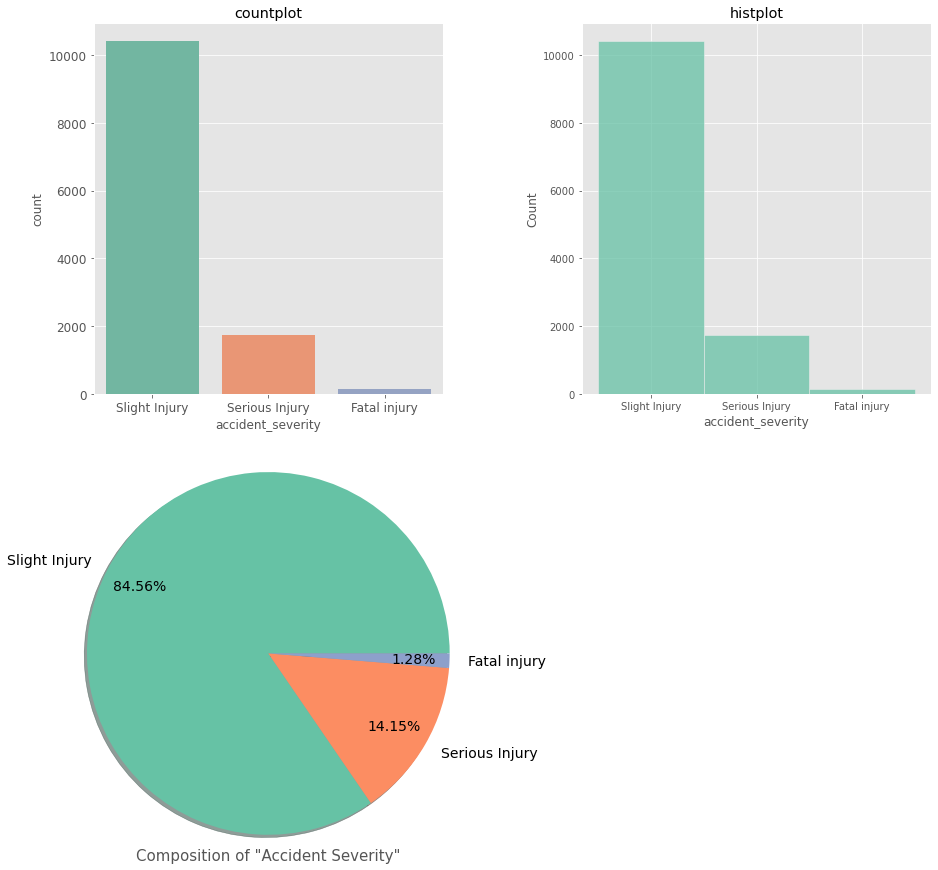

In [23]:
#understanding the distribution of the target column
fig = plt.figure(figsize=(15,15))
fig.add_subplot(2,2,1)
ax1 = sns.countplot(df['accident_severity'])
ax1.set_title('countplot')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)



fig.add_subplot(2,2,2)
ax2 =sns.histplot(df['accident_severity'])
ax2.set_title('histplot')

ax3 = plt.subplot(2,2,3)
plt.pie(df["accident_severity"].value_counts(),
        labels=list(df["accident_severity"].unique()),

        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14},
       )

plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()


-

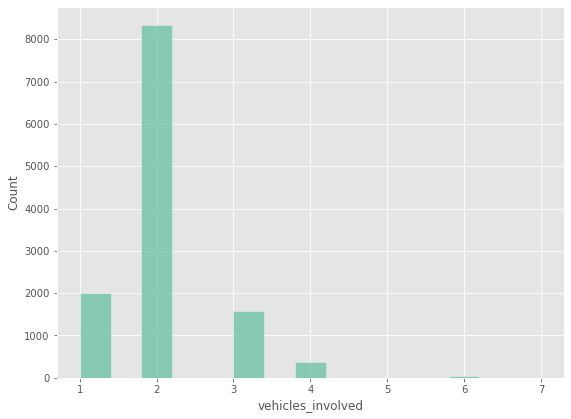

In [24]:
fig = plt.figure(figsize=(20,15))
fig.add_subplot(2,2,1)
ax1 = sns.histplot(data = df , x= 'vehicles_involved')


Accidents involving five vehicles is almost negligible

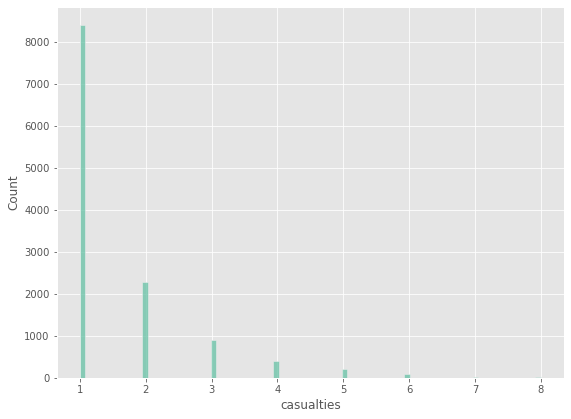

In [25]:
fig = plt.figure(figsize=(20,15))
fig.add_subplot(2,2,1)
ax1 = sns.histplot(data = df , x= 'casualties')

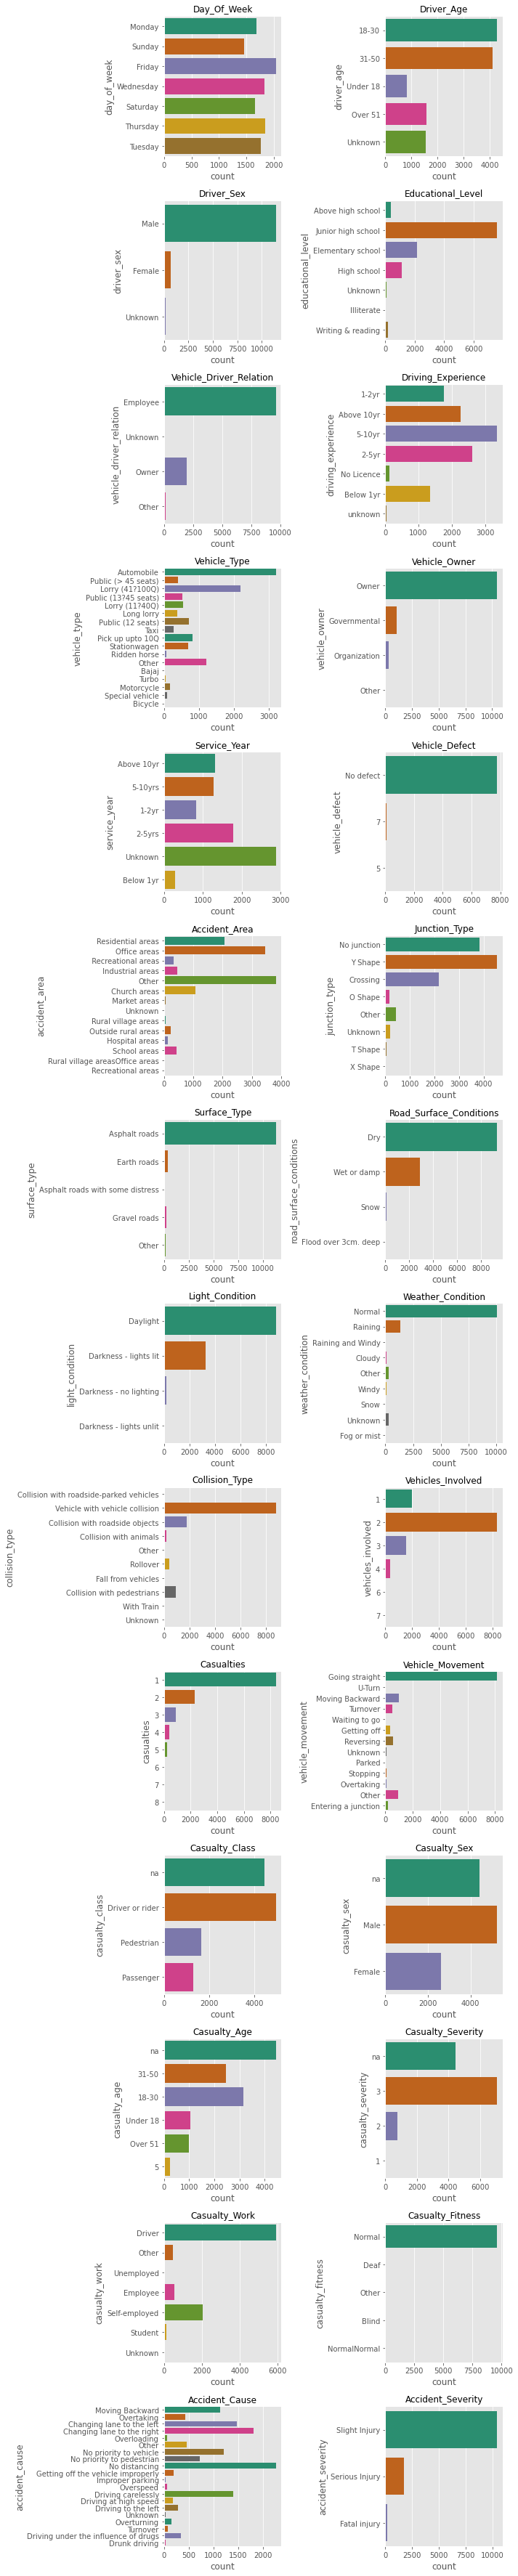

In [26]:
# Visualizing categorical feature distribution
fig = plt.figure(figsize=(10,70))

plotnum=1

for col in df.drop(['hour', 'minute', 'lanes', 'road_allignment', 'pedestrian_movement'], axis=1):
    if plotnum <= df.shape[1]:
        ax1 = plt.subplot(20,2,plotnum)
        sns.countplot(data=df, y=col, palette='Dark2')
        ax1.set_title(col.title(),fontsize=12)
    plotnum+=1
plt.tight_layout()
        
    

Inference:
1. Maximum accidents took place on Fridays, followed by Thursday, Wednesday, Monday and Tuesday.
2. More accidents were caused by Male drivers and the age group of 18-30 followed by 31-50 contributed to maximum accidents.
3. Most of the drivers were juniour high school educated, most of them were employees and the experience was 5-10 years.
4. Maximum vehicles were owner owned and automobiles, they had no defects and the service year was unknown for most.
5. For most accidents no details on accident area and next followed by office areas. Most of these junctions were Y-shaped.
6. The surface conditions were mostly dry and the roads were asphalt. Light and weather conditions in most cases were good and the second maximum cases occured during Darkness (lights lit ) or raining condotions.
7. Most accidents occured between two vehicles.
8. Most casualities occured for the driver alone and most of them were male. Almost all vehicles were going straight as well.
9. Casiuality severity was mostly 3 and cause accident was inadequate distancing.



Text(0.5, 1.0, 'Accidents in each minute of an hour')

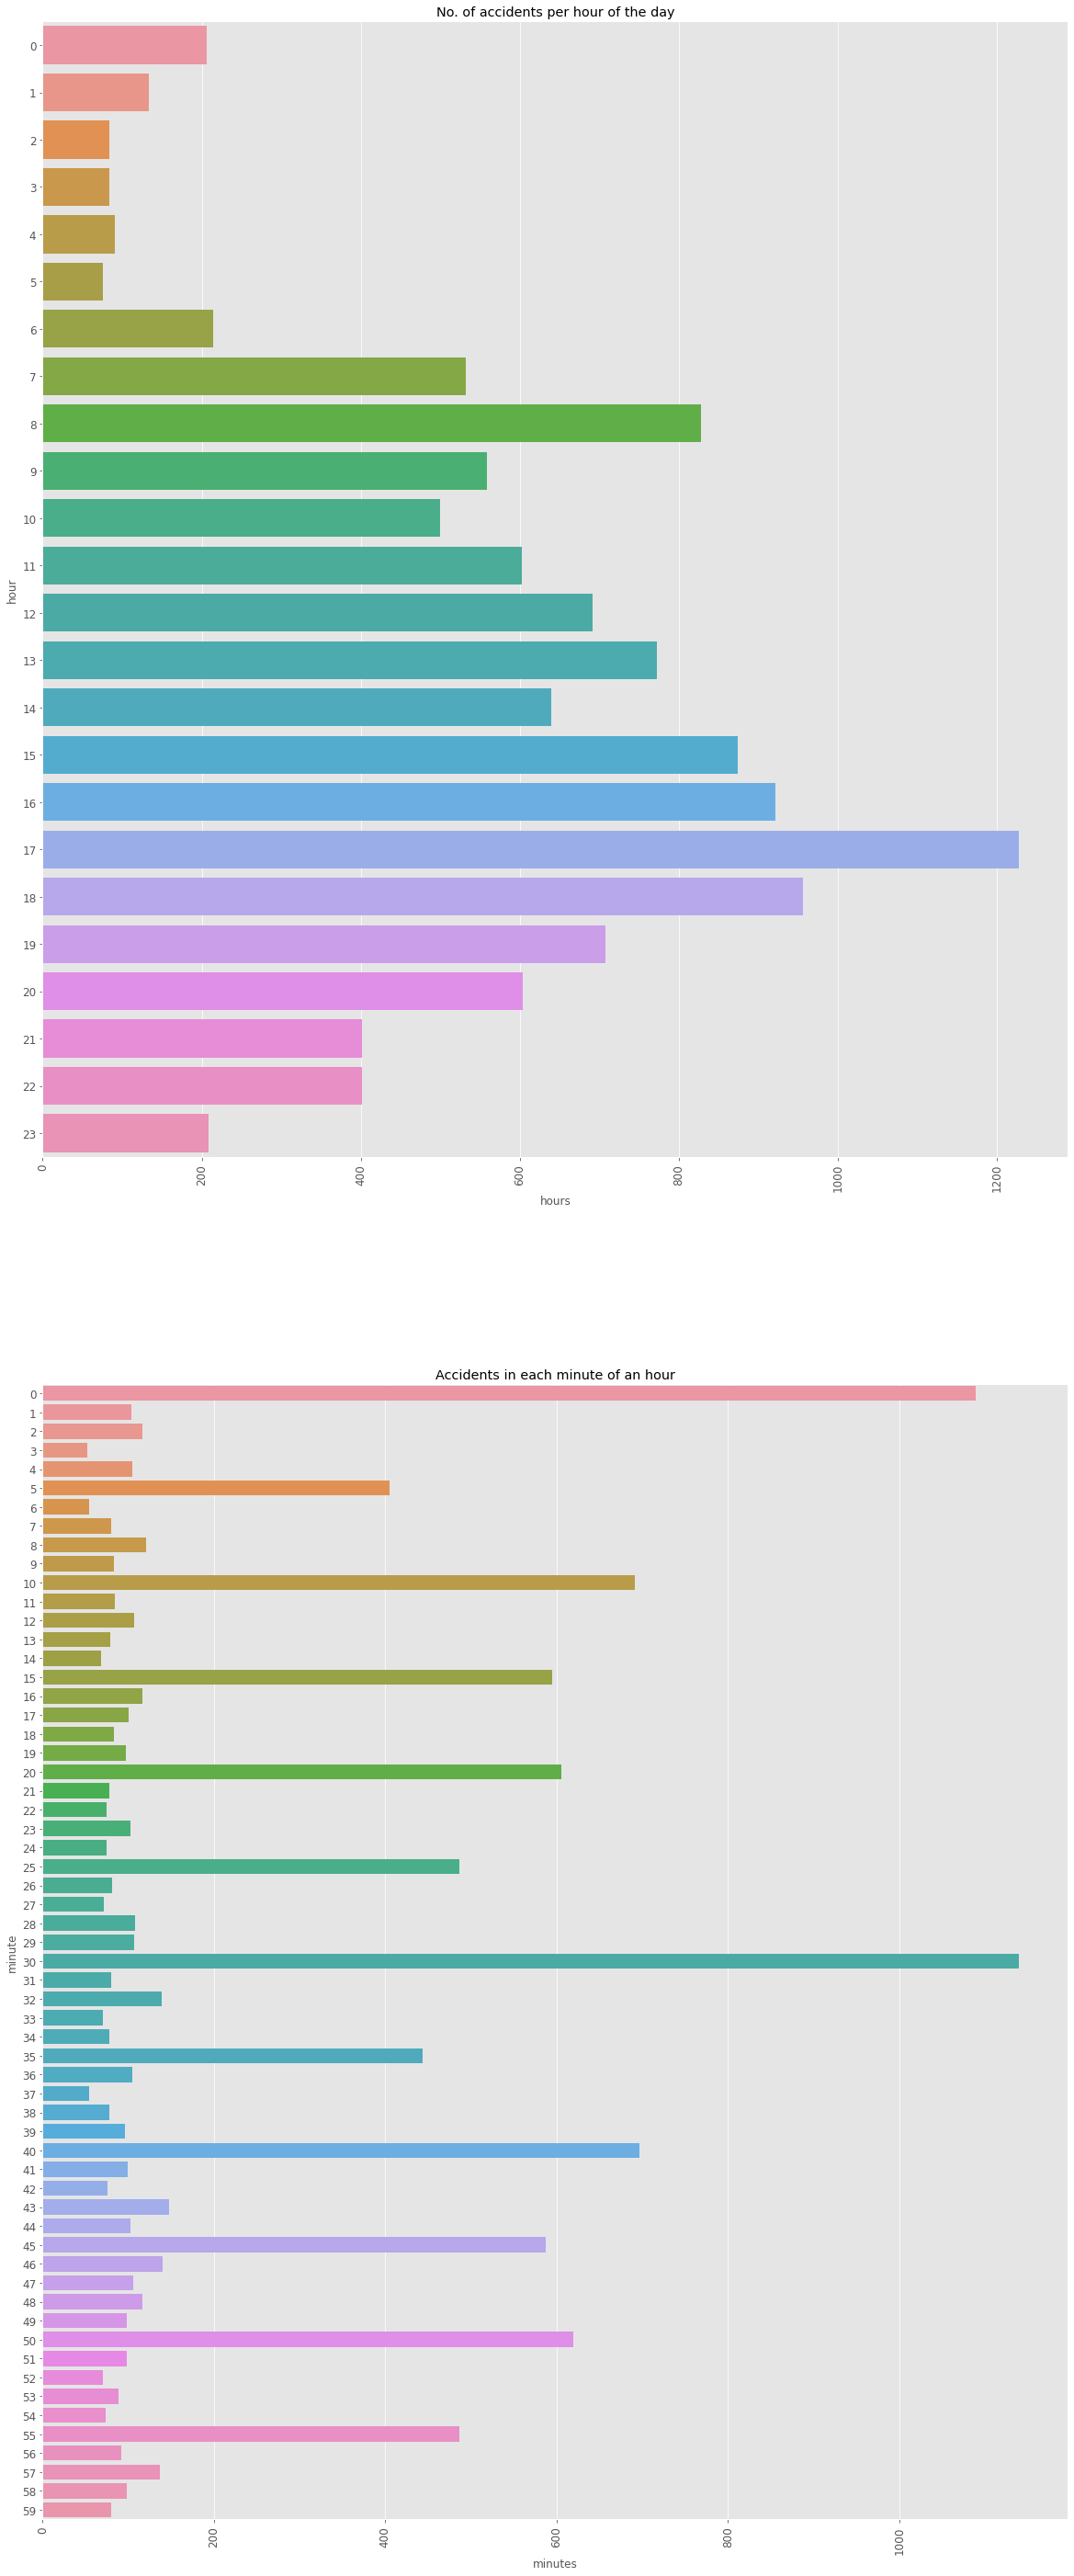

In [27]:
fig = plt.figure(figsize = (20,50))

fig.add_subplot(2,1,1)
ax1=sns.countplot(data = df, y = 'hour')
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)
plt.xlabel('hours')
plt.title('No. of accidents per hour of the day')

fig.add_subplot(2,1,2)
ax2=sns.countplot(data=df,y = 'minute')
plt.xticks(fontsize = 12,rotation = 90)
plt.yticks(fontsize = 12)
plt.xlabel('minutes')
plt.title('Accidents in each minute of an hour')


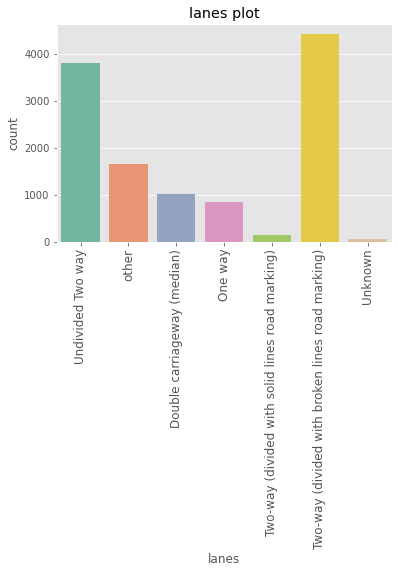

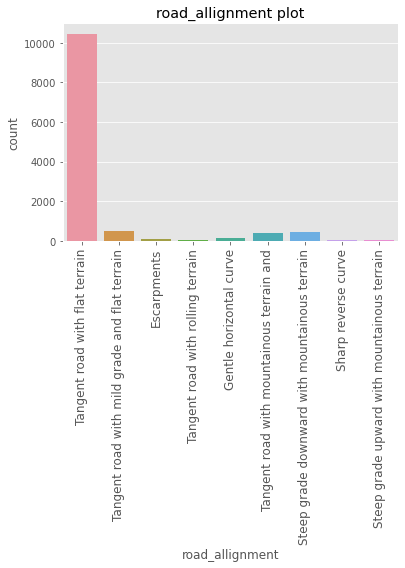

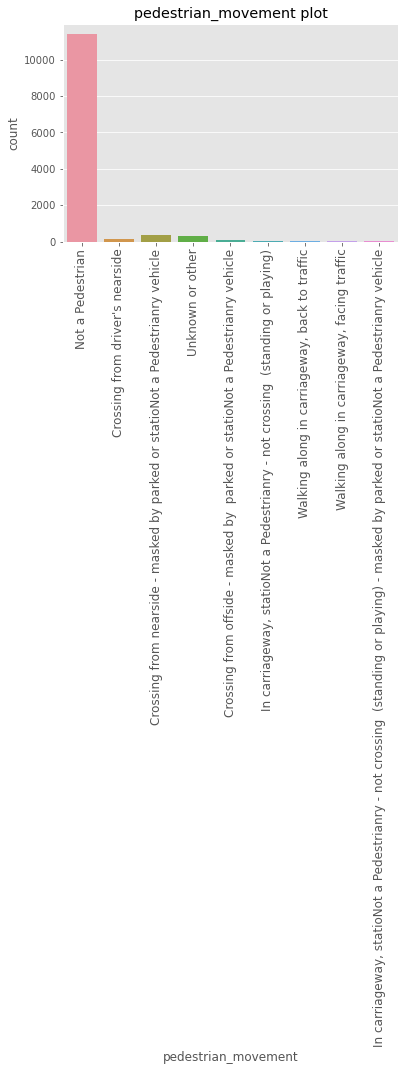

In [28]:
col_nm = ['lanes', 'road_allignment', 'pedestrian_movement']

for col in col_nm:
    sns.countplot(data=df,x=col)
    plt.title(col + ' plot')
    plt.xticks(fontsize =12, rotation = 90)
    plt.show()

Inference:
1. Maximum accidents take place during evening 5pm, and accidents are more during the hours(3pm to 6pm). There was also a spike in accidents during 8am time.
2. There is also a spike in accidents in every 5minutes. This spike is exceptionally high during the first ghalf of the hour.


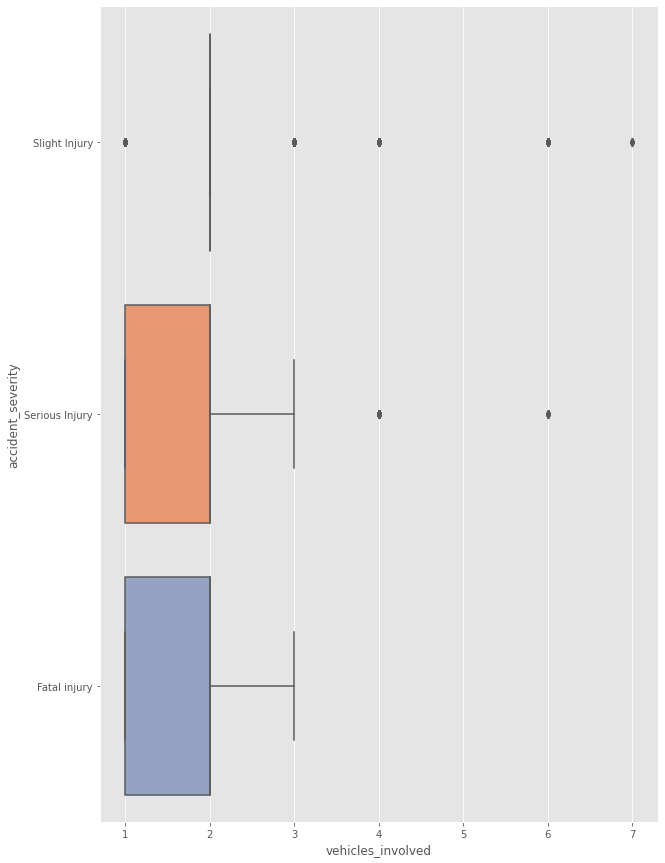

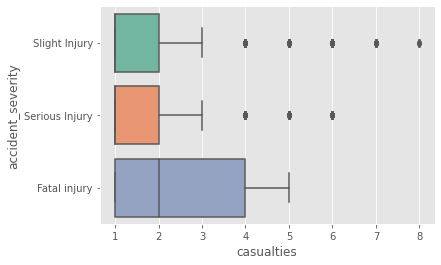

In [29]:
# trying to relate numerical features to the target
fig = plt.figure(figsize=(10,15))


cols = ['vehicles_involved', 'casualties']
for col in cols :
    sns.boxplot(data = df, x = col, y = 'accident_severity')
    plt.show()

Inferenece: Casualties more for fatal injuries

<Figure size 720x360 with 0 Axes>

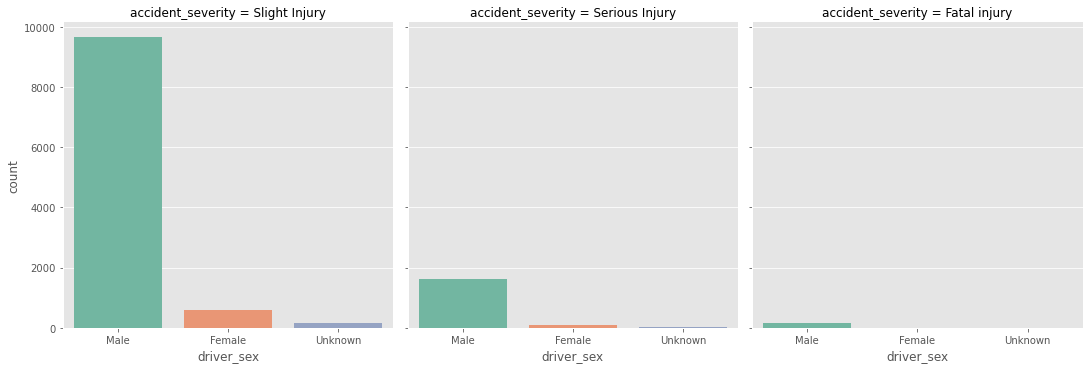

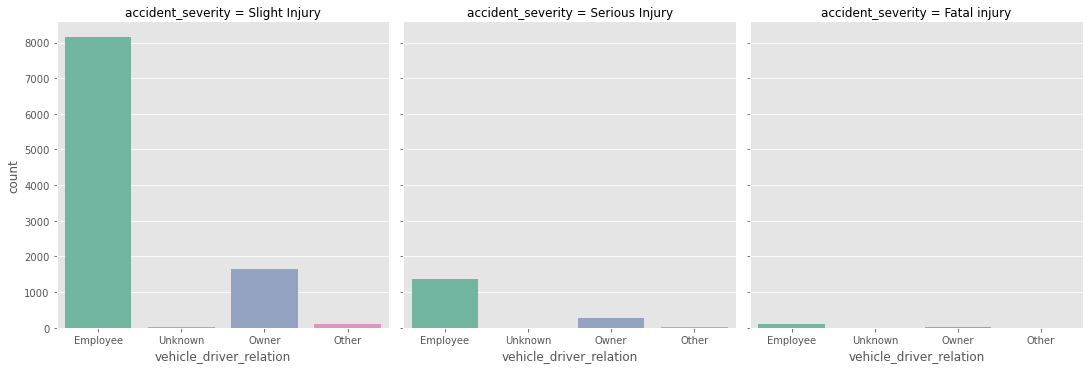

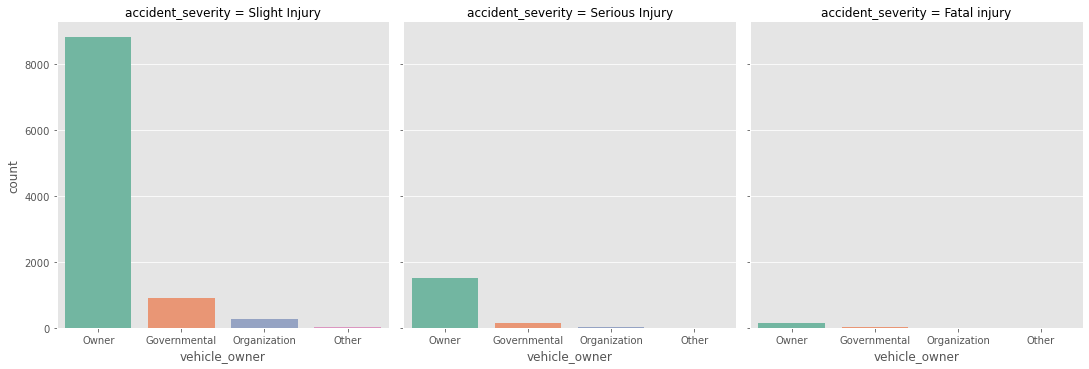

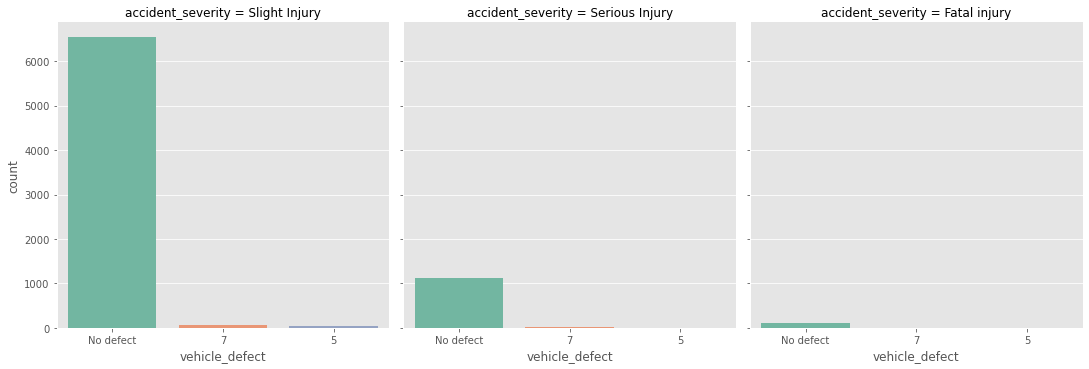

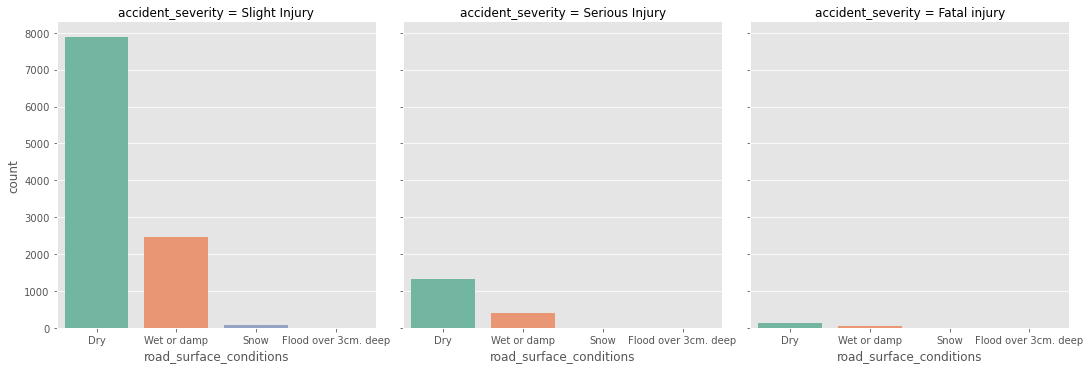

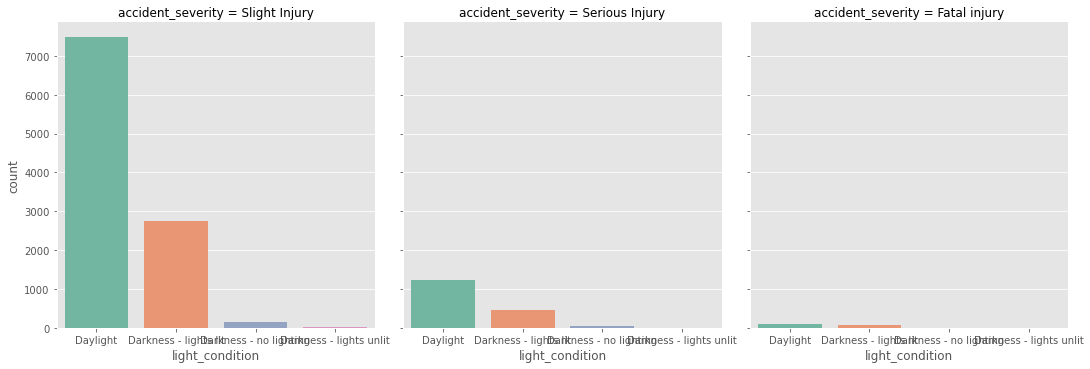

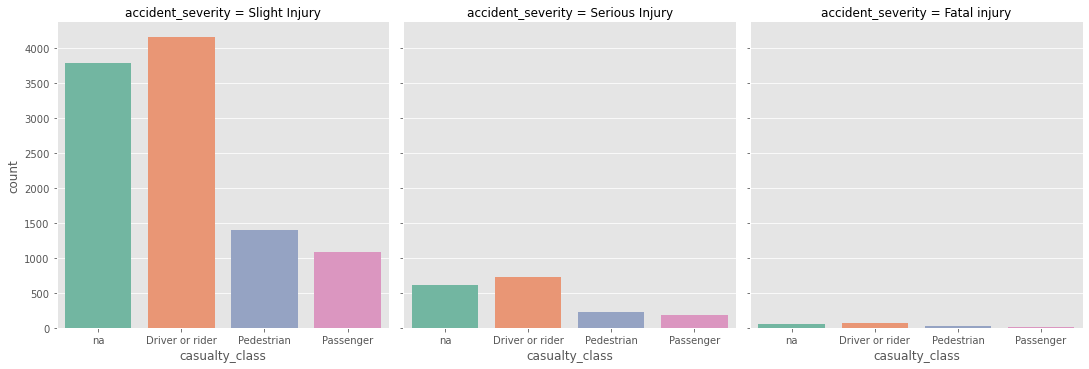

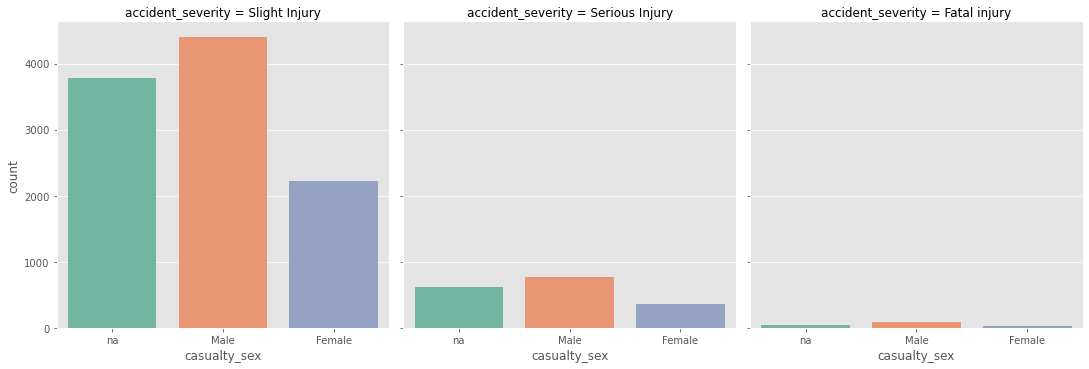

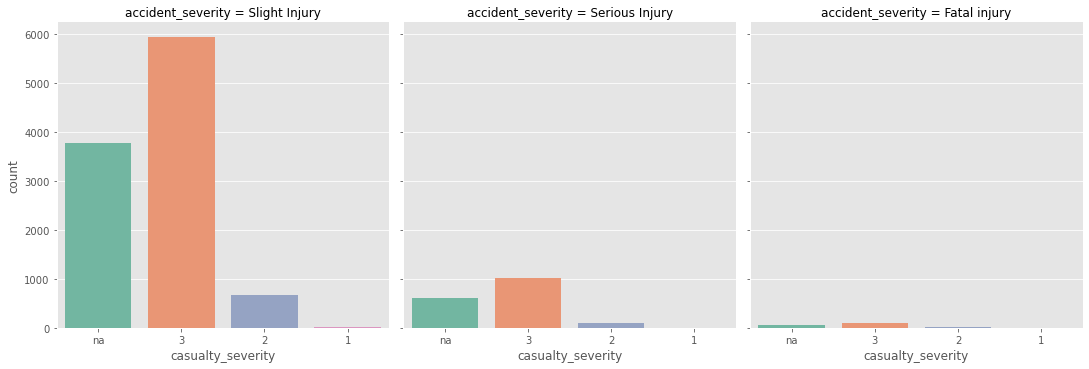

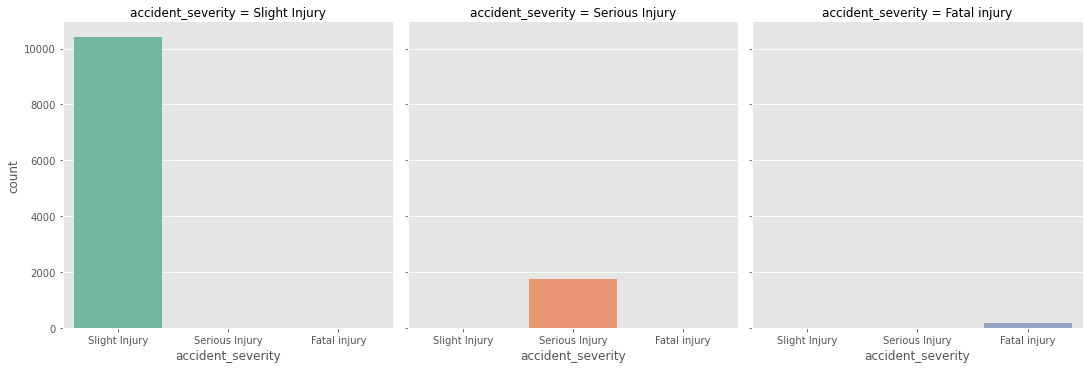

In [30]:
fig = plt.figure(figsize = (10,5))
for col in df.select_dtypes(include = 'object'):
    if df[col].nunique() <= 4:
        sns.catplot(x = col, col = 'accident_severity', kind= 'count', data = df)
# sns.catplot(x = 'accident_cause', kind='count', col = 'accident_severity', data=df, sharey=False)
# plt.xticks(fontsize = 12, rotation = 60)
# plt.show()
# df.dtypes

Trying to relate any categorical variable with the target variables.

Inference : No different trend in accident severity based classes of these categorical variable

In [31]:
corr=df.corr()
corr

,vehicles_involved,casualties,hour,minute
vehicles_involved,1.000000,0.213427,0.023095,0.019083
casualties,0.213427,1.000000,0.051761,0.009764
hour,0.023095,0.051761,1.000000,-0.051828
minute,0.019083,0.009764,-0.051828,1.000000


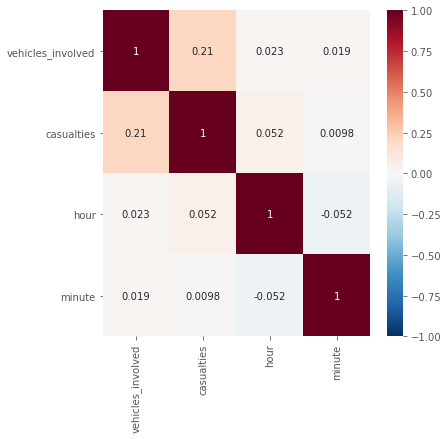

In [32]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

No corelated numerical features

### Preprocessing

##### Missing value treatment

The columns with missing values are

educational_level           741 - okay okay 

vehicle_driver_relation     579 - highly imbanlanced

driving_experience          829 - okay

vehicle_type                950 - okay

vehicle_owner               482 - imbal

service_year               3928--

vehicle_defect             4427--

accident_area               239 - okay

lanes                       385 - okay

road_allignment             142 - okay

junction_type               887 - okay

surface_type                172 - okay

collision_type              155 - okay

vehicle_movement            308 - okay

casualty_work              3198--

casualty_fitness           2635--

#### First approach:

Out of the above columns - service_year, vehicle_defect, casualty_fitness and casualty_work do not contribute much to the target and have more missing values. Hence, we can drop these columns.


In [33]:
df.drop(['service_year','vehicle_defect','casualty_work','casualty_fitness'],axis=1,inplace = True)

#### Second approach: Replace NaN



In [34]:
df.sample(5)
# # df['educational_level'].value_counts()

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,accident_area,lanes,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,minute
6917,Wednesday,Unknown,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Office areas,other,...,Overtaking,Pedestrian,Male,31-50,3,Not a Pedestrian,Overtaking,Slight Injury,18,30
12035,Wednesday,31-50,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Office areas,Two-way (divided with broken lines road marking),...,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Slight Injury,15,10
11150,Saturday,18-30,Male,High school,Employee,2-5yr,Long lorry,Owner,Other,Undivided Two way,...,Going straight,na,na,na,na,Not a Pedestrian,Changing lane to the left,Slight Injury,17,55
2902,Tuesday,Unknown,Female,Junior high school,Employee,5-10yr,Public (12 seats),Owner,Other,Two-way (divided with broken lines road marking),...,Going straight,na,na,na,na,Not a Pedestrian,Driving at high speed,Slight Injury,7,15
4898,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,other,...,Moving Backward,Pedestrian,Female,Under 18,3,Crossing from nearside - masked by parked or s...,No priority to pedestrian,Slight Injury,14,4


In [35]:
# df.mode().iloc[0]
# df['educational_level'].mode()

In [36]:
#Using pandas fillna
# df['educational_level'].fillna(df['educational_level'].mode().iloc[0])#.isna().sum()
df['educational_level'] = df['educational_level'].fillna(df['educational_level'].mode().iloc[0])#.isna().sum()

In [37]:
#Using replace and np
import numpy as np6
df['driving_experience'] = df['driving_experience'].replace(to_replace = np.nan,value = df['driving_experience'].mode()[0])

In [38]:
df['driving_experience'].isna().sum()

0

In [39]:
col_nm = ['vehicle_type','accident_area','lanes','road_allignment','junction_type','collision_type','surface_type','vehicle_movement']
for col in col_nm:
    
    df[col] = df[col].fillna(df[col].mode()[0])


In [40]:
col_nm = ['vehicle_driver_relation','vehicle_owner']
for col in col_nm:
    df[col]=df[col].fillna(df[col].mode()[0])

In [41]:
df.isna().sum()
# df.head()

day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
vehicle_driver_relation    0
driving_experience         0
vehicle_type               0
vehicle_owner              0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
hour                       0
minute                     0
dtype: int64

In [42]:
# df_dup = df.copy(deep = True)
# type(df_dup)

In [43]:
# #Treating NaN with ML algorithms

# test_data = df[df['vehicle_driver_relation'].isnull()]

In [44]:
# df_dup.dropna(inplace = True)

In [45]:
# test_data

In [46]:
# train_x = df_dup.drop('vehicle_driver_relation',axis = 1)
# train_y = df_dup['vehicle_driver_relation']

In [47]:
# # train_x
# # # train_y
# type(train_y)

In [48]:
# train_y=pd.DataFrame(train_y)

In [49]:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(train_x,train_y)

In [50]:
df.describe(include = object)

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,accident_area,lanes,...,weather_condition,collision_type,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity
count,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,...,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316
unique,7,5,3,7,4,7,17,4,14,7,...,9,10,13,4,3,6,4,9,20,3
top,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Other,Two-way (divided with broken lines road marking),...,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,na,3,Not a Pedestrian,No distancing,Slight Injury
freq,2041,4271,11437,8360,10206,4192,4155,10941,4058,4796,...,10063,8929,8466,4944,5253,4443,7076,11390,2263,10415


In [51]:
#Encode:

from sklearn.preprocessing import LabelEncoder
df['driver_age'] = LabelEncoder().fit_transform(df.driver_age)
# df['educational_level'] = LabelEncoder().fit_transform(df.educational_level)
# df['driving_experience'] = LabelEncoder().fit_transform(df.driving experience)
cols = df.drop(['vehicles_involved','casualties','driver_age'],axis = 1).columns
cols=list(cols)

for col in cols:
    df[col] = LabelEncoder().fit_transform(df[col])



In [52]:
df

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,accident_area,lanes,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,1,0,1,0,0,0,0,3,9,2,...,2,3,2,5,3,5,9,2,17,2
1,1,1,1,4,0,3,11,3,6,4,...,2,3,2,5,3,5,16,2,17,2
2,1,0,1,4,0,0,5,3,1,6,...,2,0,1,1,2,5,0,1,17,2
3,3,0,1,4,0,2,11,0,6,6,...,2,2,0,0,2,5,1,2,1,6
4,3,0,1,4,0,1,0,3,4,6,...,2,3,2,5,3,5,16,2,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,6,1,1,4,0,1,4,3,5,4,...,2,3,2,5,3,5,10,2,16,15
12312,3,4,1,1,0,2,0,3,5,2,...,4,3,2,5,3,5,10,2,18,0
12313,3,2,1,4,0,2,1,3,5,2,...,4,0,1,1,2,5,1,1,13,55
12314,3,0,0,4,0,3,5,3,6,4,...,4,3,2,5,3,5,5,2,13,55


<AxesSubplot:>

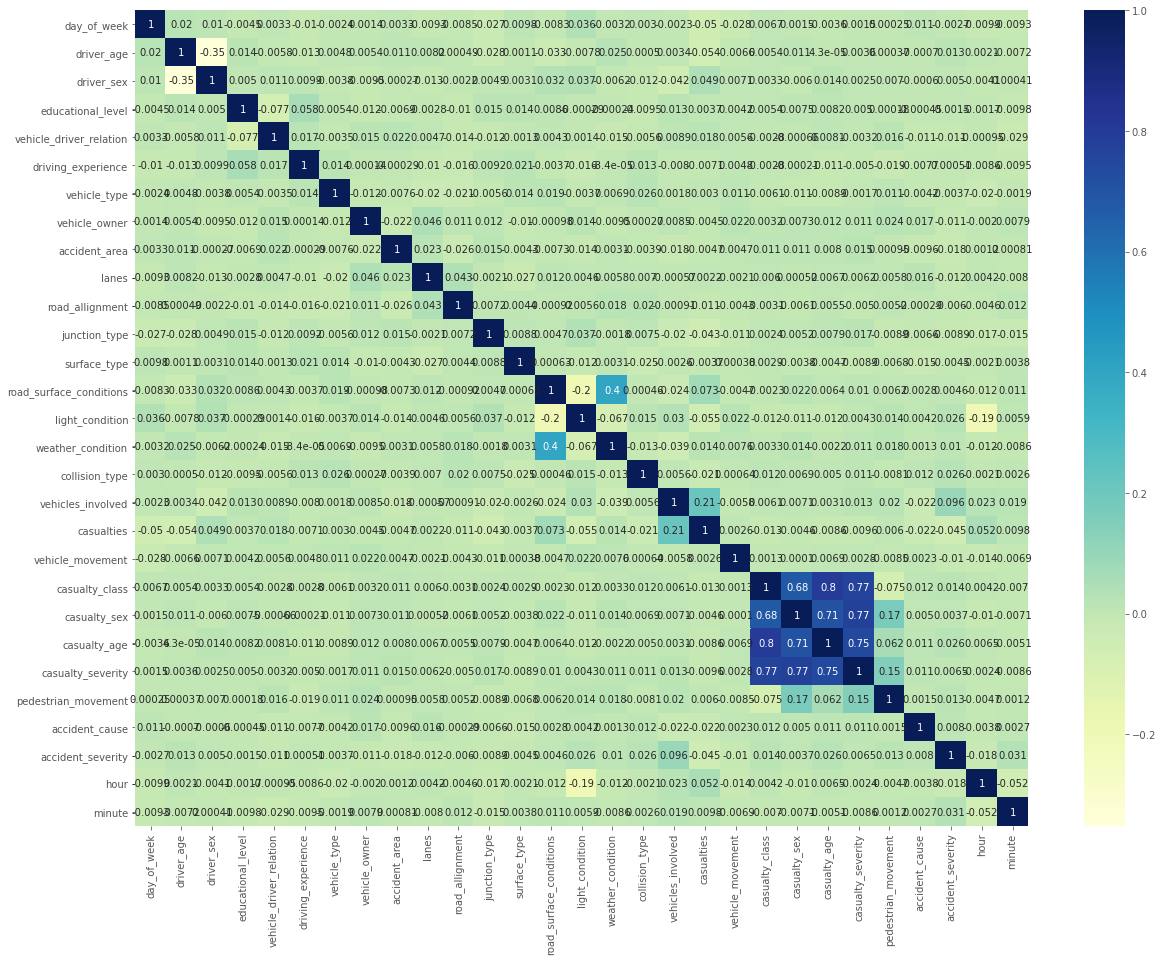

In [53]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot = True, cmap = 'YlGnBu')

In [54]:
X = df.drop('accident_severity',axis = 1)
y = df['accident_severity']

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape ,y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [55]:
type(y_train)

pandas.core.series.Series

In [56]:
# #Upsampling using SMOTE
# !pip install -U imbalanced-learn

from imblearn.over_sampling import SMOTE

print('Before sampling, count of index 0 : {}'.format(sum(y_train == 0)))
print('Before sampling, count of index 1 : {}'.format(sum(y_train == 1)))
print('Before sampling, count of index 2 : {}'.format(sum(y_train == 2)))

print('==============================================================')



sm = SMOTE()
(X_train_sampl,y_train_sampl) = sm.fit_resample(X_train,y_train)

print('==============================================================')





print('After sampling, count of index 0 : {}'.format(sum(y_train_sampl == 0)))
print('After sampling, count of index 1 : {}'.format(sum(y_train_sampl == 1)))
print('After sampling, count of index 2 : {}'.format(sum(y_train_sampl == 2)))




Before sampling, count of index 0 : 106
Before sampling, count of index 1 : 1191
Before sampling, count of index 2 : 7324
After sampling, count of index 0 : 7324
After sampling, count of index 1 : 7324
After sampling, count of index 2 : 7324


In [57]:
y_test



4281     2
4010     2
1022     1
8775     2
10000    2
        ..
9855     2
7302     1
9023     2
7936     2
438      2
Name: accident_severity, Length: 3695, dtype: int64

### Modeling

##### Logistic regression

In [58]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [59]:
#Prediction
y_pred_test = logreg.predict(X_test)

y_pred_test

array([2, 2, 2, ..., 2, 2, 2])

In [60]:
#Accuracy
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


Model accuracy score: 0.8365


In [61]:
#Predicting train results:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([2, 2, 2, ..., 2, 2, 2])

In [62]:
#training accuracy:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.8496


In [63]:
# print the scores on training and test set to check for overfitting or underfitting

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))


Training set score: 0.8496
Test set score: 0.8365


Since both scores are comparable, there is no overfitting.

In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 85% accuracy on both the training and the test set. But the model performance on both the training and test set are very comparable. It is likely the case of underfitting.

Hence, incrasing C.

In [64]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [66]:
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))


Training set score: 0.8496
Test set score: 0.8365


The accuracy remains same.

<!-- ###### Confusion matrix 


A **confusion** matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called **Type I error**.

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error**.

These four outcomes are summarized in a confusion matrix given below. -->

In [67]:
# from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_test, y_pred_test)

# print('Confusion matrix\n\n', cm)

# print('\nTrue Positives(TP) = ', cm[0,0])

# print('\nTrue Negatives(TN) = ', cm[1,1])

# print('\nFalse Positives(FP) = ', cm[0,1])

# print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[   0    0   52]
 [   0    0  552]
 [   0    0 3091]]

True Positives(TP) =  0

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  0


##### Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-



In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.00      0.00      0.00       552
           2       0.84      1.00      0.91      3091

    accuracy                           0.84      3695
   macro avg       0.28      0.33      0.30      3695
weighted avg       0.70      0.84      0.76      3695



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)



RandomForestClassifier(n_estimators=200)

In [76]:
y_pred = rf.predict(X_test)
print('Accuracy scores in random forest = {:.4f}'.format(accuracy_score(y_test, y_pred)))
# #         scores['rf']['roc_auc'] = roc_auc_score(y_test, y_pred)



Accuracy scores in random forest = 0.8406
